In [20]:
import pandas as pd
from constants import *
from sklearn.cluster import KMeans
from flows.specific.custom_flow_from_shapefile import  CustomFlowFromShapefile
import os
from data_sources.specific.coca import Coca
from data_sources.specific.gold_stock_price import GoldStockPrice
from data_sources.specific.malaria_cases import Malaria
from embedders.specific.identity_embedder import IdentityEmbbeder
from embedders.specific.aggregation_embedder import AggregationEmbedder
from embedders.specific.linear_regression_coefficient_embedder import LinearRegressionCoefficientEmbedder

from clusterers.specific.identity_clusterer import IdentityClusterer
from clusterers.specific.sklearn_vector_clusterer import SklearnVectorClusterer
from clusterers.specific.quantile_clusterer import QuantileClusterer


In [21]:
fuentes_incluidas = [Coca]
target_col = 'malaria_num_cases_total'

In [12]:
flow = CustomFlowFromShapefile(ID = 'basic_analysis',
                                name = "Basic Analysis",
                                time_resolution = MONTH,
                                shapefile_location = os.path.join(GEO_DATA_FOLDER,"municipalities/municipalities.shp"),
                                id_column = "muni_id",
                                vector_data_sources=fuentes_incluidas,
                                matrix_data_sources=[],
                                embedder=AggregationEmbedder(),
                                clusterer=QuantileClusterer(ID="quantile", name="Quantile", quantiles=[0.2, 0.4, 0.6, 0.8] ,column_to_cluster="coca_coca_total"))

In [13]:
flow.initial_geography = flow.get_initial_geography()

# Loads Data
# ----------------------
flow.df_vector, flow.df_matrix = flow.loadData(flow.initial_geography)
flow.data_loaded = True

Loads Vector Data
Found 1 elements
   Extracts 1 of 1: Coca (coca) 
   Loads Data
      No file found for year 2001
   Builds Overlay


/Users/andreaparra/Dropbox/4_Work/DataLamaCovid/code/repositories/pathogen_study_regions_generator/src/utils/geographic_functions.py:61: UserWarning: `keep_geom_type=True` in overlay resulted in 2 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  df_overlayed = geopandas.overlay(df_geo, df_values, how='intersection')


   Changes Time Resolution
Done

Loads Matrix Data
Found 0 elements
Done
------------------


In [14]:
flow.df_vector

,ID,date,coca_coca_total
0,5467,2000-01-31,0.000000e+00
1,63690,2000-01-31,0.000000e+00
2,13873,2000-01-31,0.000000e+00
3,66001,2000-01-31,0.000000e+00
4,66045,2000-01-31,0.000000e+00
...,...,...,...
255811,13838,2019-12-31,0.000000e+00
255812,68081,2019-12-31,0.000000e+00
255813,25875,2019-12-31,0.000000e+00
255814,68079,2019-12-31,0.000000e+00


In [15]:
# Embbeds Data
# ----------------------
flow.embeddData()
flow.data_embedded = True

flow.df_embedded_vector

,ID,coca_coca_total
0,5001,0.000000e+00
1,5002,0.000000e+00
2,5004,7.823189e+08
3,5021,0.000000e+00
4,5030,0.000000e+00
...,...,...
1117,97889,6.206975e+12
1118,99001,3.591033e+12
1119,99524,2.993756e+12
1120,99624,2.630580e+10


In [16]:
# Clusters Data
# ----------------------
flow.clusterData()
flow.data_clustered = True
flow.clustered_ids

,ID,cluster_id
0,5001,3
1,5002,3
2,5004,3
3,5021,3
4,5030,3
...,...,...
1117,97777,4
1118,97889,4
1119,99001,4
1120,99524,4


In [17]:
# Builds final geography
# ----------------------
flow.buildFinalGeography()

In [18]:
flow.final_geography

,ID,geometry
0,3,"MULTIPOLYGON (((-77.22707 0.68013, -77.22708 0..."
1,4,"MULTIPOLYGON (((-77.07788 0.29587, -77.07796 0..."


<AxesSubplot:>

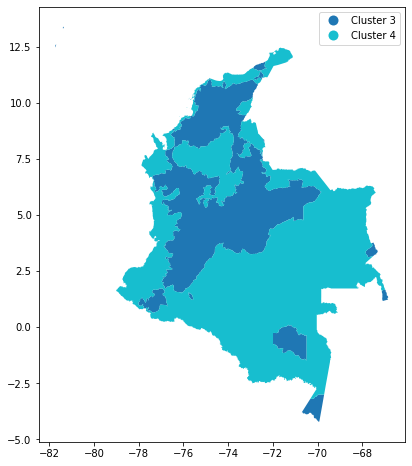

In [19]:
flow.final_geography[CLUSTER_ID] = flow.final_geography[ID].apply(lambda i : f"Cluster {i}")
flow.final_geography.plot(column = CLUSTER_ID, figsize = (8,8), legend=True)